PART ONE

1. Import Libraries

"Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are
fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have 
strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts 
in the trend, and typically handles outliers well."

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
pd.options.display.float_format = '{:.2f}'.format #remove scientific notation

Importing plotly failed. Interactive plots will not work.


Suppress Pandas warnings

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5))   #returns False, without Warning

False


PART TWO

2. Read the data in from the "states all extended" CSV file.

In [3]:
edu_df = pd.read_csv('../US_Education/states_all_extended.csv')

In [4]:
edu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


2. Create a function that returns every year and the combined sum (of 50 states) of a given collumn (In this case, we choose the TOTAL_EXPENDITURE)

In [5]:
def TotalsByYear(column):
    year_1992 = edu_df[edu_df['YEAR'] == 1992]
    year_1993 = edu_df[edu_df['YEAR'] == 1993]
    year_1994 = edu_df[edu_df['YEAR'] == 1994]
    year_1995 = edu_df[edu_df['YEAR'] == 1995]
    year_1996 = edu_df[edu_df['YEAR'] == 1996]
    year_1997 = edu_df[edu_df['YEAR'] == 1997]
    year_1998 = edu_df[edu_df['YEAR'] == 1998]
    year_1999 = edu_df[edu_df['YEAR'] == 1999]
    year_2000 = edu_df[edu_df['YEAR'] == 2000]
    year_2001 = edu_df[edu_df['YEAR'] == 2001]
    year_2002 = edu_df[edu_df['YEAR'] == 2002]
    year_2003 = edu_df[edu_df['YEAR'] == 2003]
    year_2004 = edu_df[edu_df['YEAR'] == 2004]
    year_2005 = edu_df[edu_df['YEAR'] == 2005]
    year_2006 = edu_df[edu_df['YEAR'] == 2006]
    year_2007 = edu_df[edu_df['YEAR'] == 2007]
    year_2008 = edu_df[edu_df['YEAR'] == 2008]
    year_2009 = edu_df[edu_df['YEAR'] == 2009]
    year_2010 = edu_df[edu_df['YEAR'] == 2010]
    year_2011 = edu_df[edu_df['YEAR'] == 2011]
    year_2012 = edu_df[edu_df['YEAR'] == 2012]
    year_2013 = edu_df[edu_df['YEAR'] == 2013]
    year_2014 = edu_df[edu_df['YEAR'] == 2014]
    year_2015 = edu_df[edu_df['YEAR'] == 2015]
    year_2016 = edu_df[edu_df['YEAR'] == 2016]
    
    SUM_year_1992 = year_1992[column].sum()
    SUM_year_1993 = year_1993[column].sum()
    SUM_year_1994 = year_1994[column].sum()
    SUM_year_1995 = year_1995[column].sum()
    SUM_year_1996 = year_1996[column].sum()
    SUM_year_1997 = year_1997[column].sum()
    SUM_year_1998 = year_1998[column].sum()
    SUM_year_1999 = year_1999[column].sum()
    SUM_year_2000 = year_2000[column].sum()
    SUM_year_2001 = year_2001[column].sum()
    SUM_year_2002 = year_2002[column].sum()
    SUM_year_2003 = year_2003[column].sum()
    SUM_year_2004 = year_2004[column].sum()
    SUM_year_2005 = year_2005[column].sum()
    SUM_year_2006 = year_2006[column].sum()
    SUM_year_2007 = year_2007[column].sum()
    SUM_year_2008 = year_2008[column].sum()
    SUM_year_2009 = year_2009[column].sum()
    SUM_year_2010 = year_2010[column].sum()
    SUM_year_2011 = year_2011[column].sum()
    SUM_year_2012 = year_2012[column].sum()
    SUM_year_2013 = year_2013[column].sum()
    SUM_year_2014 = year_2014[column].sum()
    SUM_year_2015 = year_2015[column].sum()
    SUM_year_2016 = year_2016[column].sum()
    
    SUM_df = pd.DataFrame({'Year': ['1992','1993','1994','1995','1996', '1997','1998','1999','2000','2001','2002','2003',
                                    '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016',],
                          'Total_Expenditure':[SUM_year_1992,SUM_year_1993,SUM_year_1994,SUM_year_1995,SUM_year_1996,SUM_year_1997,
                                               SUM_year_1998,SUM_year_1999,SUM_year_2000,SUM_year_2001,SUM_year_2002,SUM_year_2003,
                                               SUM_year_2004,SUM_year_2005,SUM_year_2006,SUM_year_2007,SUM_year_2008,SUM_year_2009,
                                               SUM_year_2010,SUM_year_2011,SUM_year_2012,SUM_year_2013,SUM_year_2014,SUM_year_2015,
                                               SUM_year_2016]
                          })
    return SUM_df;

In [6]:
TotalsByYear(column="TOTAL_EXPENDITURE")
#edu_df[edu_df['YEAR'] == 1992]

,Year,Total_Expenditure
0,1992,237333143.00
1,1993,244202408.00
2,1994,252664869.00
3,1995,281831835.00
4,1996,297740499.00
5,1997,315861220.00
6,1998,336384794.00
7,1999,360474429.00
8,2000,386177409.00
9,2001,417014891.00


Note: These numbers are in the Thousands. i.e. 23,733,143 = $23,733,143,000

2. Create a dataframe with the needed variables(Year and total expenditures). set the index to the 'year' column.

In [7]:
total_df = TotalsByYear(column="TOTAL_EXPENDITURE")

In [8]:
total_df.set_index('Year')

,Total_Expenditure
Year,
1992,237333143.00
1993,244202408.00
1994,252664869.00
1995,281831835.00
1996,297740499.00
1997,315861220.00
1998,336384794.00
1999,360474429.00
2000,386177409.00


create a new dataframe (old one will be used again later). The new dataframe will initially be created with an integer index so we can rename the columns.

In [9]:
df = total_df
df.head()

,Year,Total_Expenditure
0,1992,237333143.00
1,1993,244202408.00
2,1994,252664869.00
3,1995,281831835.00
4,1996,297740499.00


PART THREE

3. For prophet to work, we need to change the names of these columns to 'ds' and 'y'. Additioinally, fbprophet doesn't like the index to be a datetime...it wants to see 'ds' as a non-index column, so we won't set an index differnetly than the integer index.

In [10]:
df=df.rename(columns={'Year':'ds', 'Total_Expenditure':'y'})

In [11]:
df.head()

,ds,y
0,1992,237333143.00
1,1993,244202408.00
2,1994,252664869.00
3,1995,281831835.00
4,1996,297740499.00


4. Plot data

<AxesSubplot:xlabel='ds'>

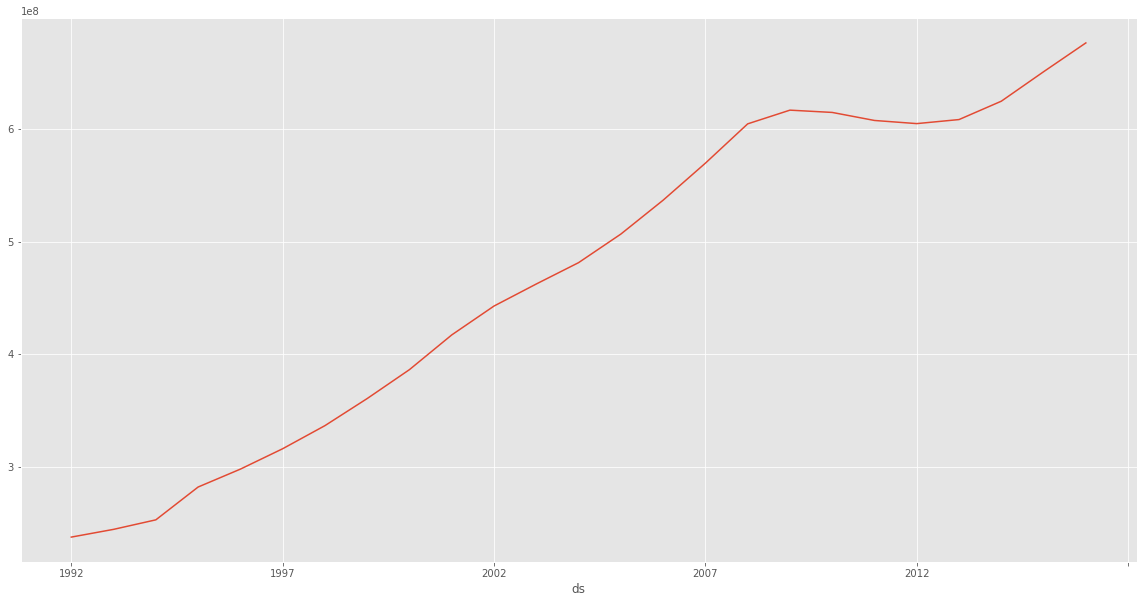

In [12]:
df.set_index('ds').y.plot()

5.  Take a look at the data to determine if trends exist, whether it is stationary, has any outliers and/or any other anamolies. Prophet's example uses the log-transform as a way to remove some of these anomolies. Taking the log of a number is easily reversible to be able to see your original data. 

To log-transform your data, use numpy's log() function

In [13]:
df['y'] = np.log(df['y'])

In [14]:
df.tail()

,ds,y
20,2012,20.22
21,2013,20.23
22,2014,20.25
23,2015,20.29
24,2016,20.33


Plot the graph

<AxesSubplot:xlabel='ds'>

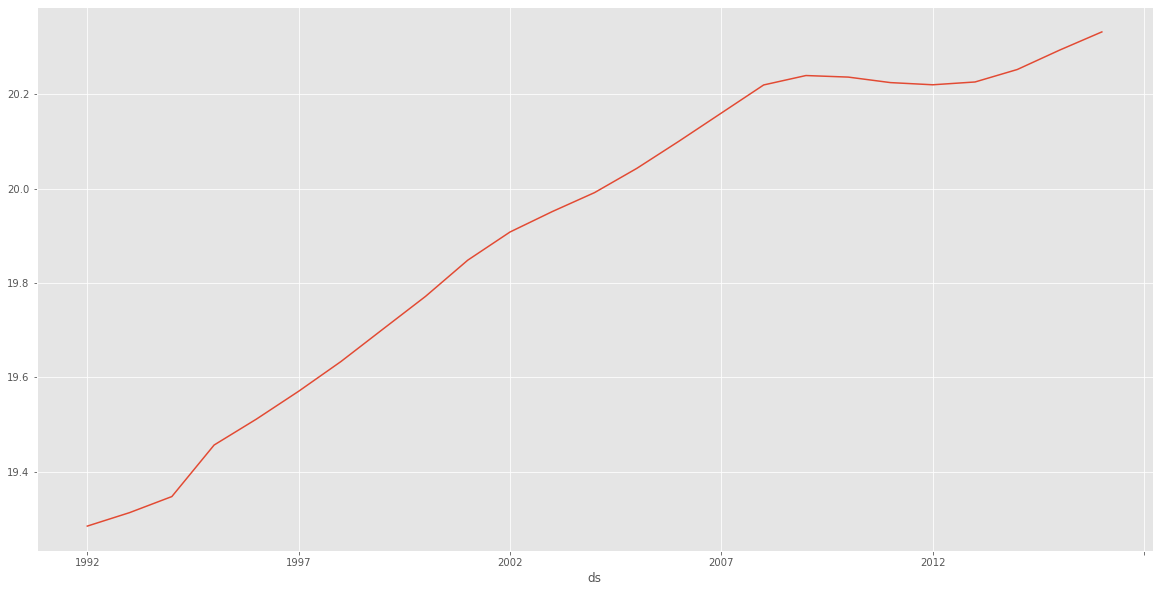

In [15]:
df.set_index('ds').y.plot()

6.the plot looks the same as the first one but just at a different scale

PART FOUR

7. set prophet up to begin modeling our data.

In [16]:
model = Prophet(yearly_seasonality=True)
model.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change. It then puts a sparse prior on the magnitudes of the rate changes (equivalent to L1 regularization) - this essentially means that Prophet has a large number of possible places where the rate can change, but will use as few of them as possible. By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series.

8.  add some future dates to our dataframe. For this example, I want to forecast 4 years into the future. y = year

In [17]:
future = model.make_future_dataframe(periods=4, freq = 'y')
future.tail()

,ds
24,2016-01-01
25,2016-12-31
26,2017-12-31
27,2018-12-31
28,2019-12-31


9. To forecast this future data, we need to run it through Prophet's model.

In [18]:
forecast = model.predict(future)

In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
24,2016-01-01,1.91,20.31,20.33,1.91,1.91,18.41,18.41,18.41,18.41,18.41,18.41,0.00,0.00,0.00,20.32
25,2016-12-31,1.93,20.30,20.34,1.91,1.95,18.39,18.39,18.39,18.39,18.39,18.39,0.00,0.00,0.00,20.32
26,2017-12-31,1.95,20.23,20.34,1.89,2.00,18.34,18.34,18.34,18.34,18.34,18.34,0.00,0.00,0.00,20.29
27,2018-12-31,1.97,20.11,20.32,1.86,2.08,18.24,18.24,18.24,18.24,18.24,18.24,0.00,0.00,0.00,20.22
28,2019-12-31,2.00,19.92,20.26,1.83,2.16,18.09,18.09,18.09,18.09,18.09,18.09,0.00,0.00,0.00,20.09


10. We really only want to look at yhat, yhat_lower and yhat_upper, so we can do that with:

In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
24,2016-01-01,20.32,20.31,20.33
25,2016-12-31,20.32,20.30,20.34
26,2017-12-31,20.29,20.23,20.34
27,2018-12-31,20.22,20.11,20.32
28,2019-12-31,20.09,19.92,20.26


PART FIVE

11. Plotting prophet Results

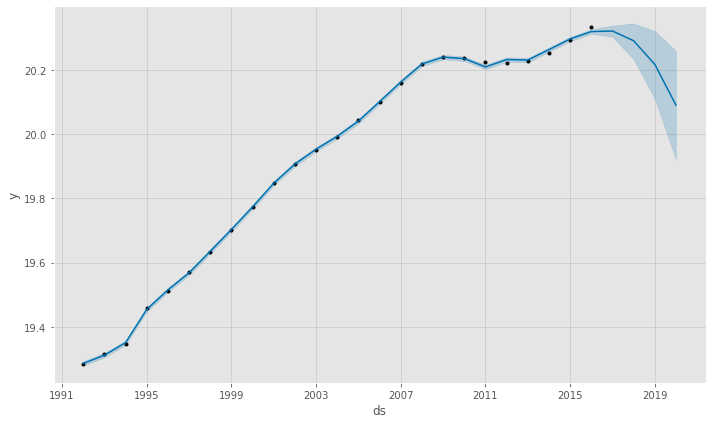

In [21]:
model.plot(forecast);

draws the original data (black dots), the model (blue line) and the error of the forecast (shaded blue area).

PART SIX

Visualizing Prophet models
build a dataframe to visualize model versus original data, we need to combine the output of the Prophet model with the  Original data set, then we'll build a new chart manually using pandas and matplotlib.

In [22]:
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

combine the original data and our forecast model data

In [23]:
total_df=total_df.rename(columns={'Year':'ds', 'Total_Expenditure':'y'})
total_df.set_index('ds', inplace=True)

In [24]:
viz_df = total_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

If we look at the head(), we see the data has been joined correctly but the scales of our original data (total) and our model (yhat) are different. We need to rescale the yhat colums(s) to get the same scale, so we'll use numpy's exp function to do that.

In [25]:
viz_df.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
1992-01-01,237333143.00,19.29,19.28,19.29
1993-01-01,244202408.00,19.31,19.30,19.32
1994-01-01,252664869.00,19.35,19.34,19.36
1995-01-01,281831835.00,19.45,19.45,19.46
1996-01-01,297740499.00,19.51,19.51,19.52


In [26]:

viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])


viz_df.head()

,y,yhat,yhat_lower,yhat_upper,yhat_rescaled
ds,,,,,
1992-01-01,237333143.00,19.29,19.28,19.29,237502543.54
1993-01-01,244202408.00,19.31,19.30,19.32,243679328.32
1994-01-01,252664869.00,19.35,19.34,19.36,253388917.65
1995-01-01,281831835.00,19.45,19.45,19.46,281026510.89
1996-01-01,297740499.00,19.51,19.51,19.52,298592552.76


Let's take a look at the expenditires and yhat_rescaled data together in a chart.

<AxesSubplot:xlabel='ds'>

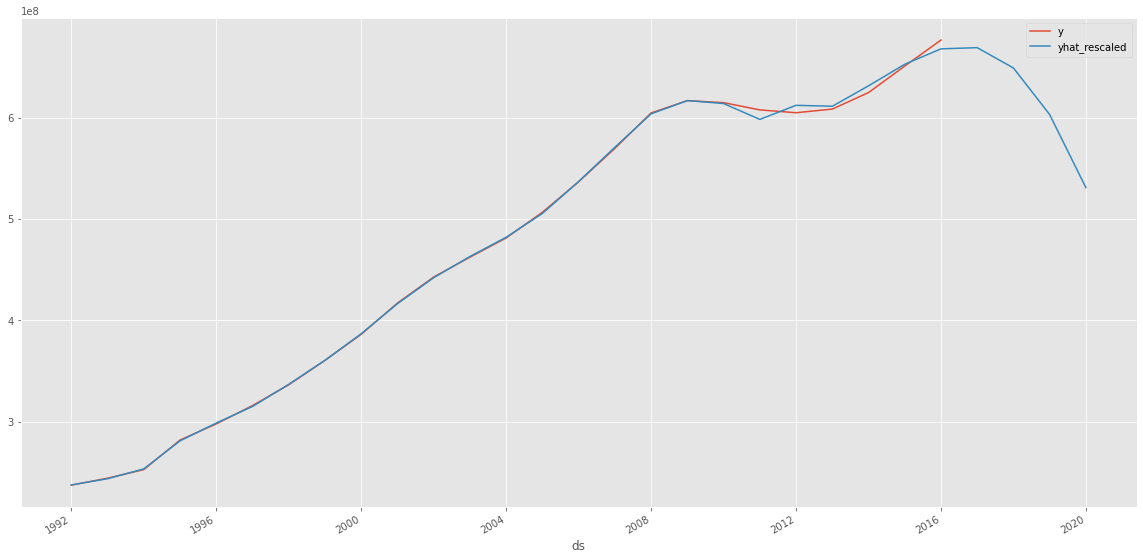

In [27]:
viz_df[['y', 'yhat_rescaled']].plot()

Model (blue)  plotted against the actual signal (orange).

find the 2nd to last date of the original expenditires data in ```total_df``` in order to ensure the original expenditires data and model data charts are connected. 

In [28]:
total_df.index = pd.to_datetime(total_df.index) #make sure our index as a datetime object
connect_date = total_df.index[-2] #select the 2nd to last date

Using the ```connect_date``` grab only the model data after that date. Mask the forecast data.

In [29]:
mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [30]:
predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2016-01-01,1.91,20.31,20.33,1.91,1.91,18.41,18.41,18.41,18.41,18.41,18.41,0.00,0.00,0.00,20.32
2016-12-31,1.93,20.30,20.34,1.91,1.95,18.39,18.39,18.39,18.39,18.39,18.39,0.00,0.00,0.00,20.32
2017-12-31,1.95,20.23,20.34,1.89,2.00,18.34,18.34,18.34,18.34,18.34,18.34,0.00,0.00,0.00,20.29
2018-12-31,1.97,20.11,20.32,1.86,2.08,18.24,18.24,18.24,18.24,18.24,18.24,0.00,0.00,0.00,20.22
2019-12-31,2.00,19.92,20.26,1.83,2.16,18.09,18.09,18.09,18.09,18.09,18.09,0.00,0.00,0.00,20.09


Build a dataframe to use in our new visualization. Follow the same steps we did before.

In [31]:
viz_df = total_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])

In [32]:
viz_df.head()

,y,yhat,yhat_lower,yhat_upper,yhat_scaled
ds,,,,,
1992-01-01,237333143.00,nan,nan,nan,nan
1993-01-01,244202408.00,nan,nan,nan,nan
1994-01-01,252664869.00,nan,nan,nan,nan
1995-01-01,281831835.00,nan,nan,nan,nan
1996-01-01,297740499.00,nan,nan,nan,nan


If we take a look at the ```tail()``` of the ```viz_df``` you'll see data for the forecasted data and NaN's for the original data series.

In [33]:
viz_df.tail()

,y,yhat,yhat_lower,yhat_upper,yhat_scaled
ds,,,,,
2016-01-01,676526434.00,20.32,20.31,20.33,667841671.77
2016-12-31,nan,20.32,20.30,20.34,669013389.21
2017-12-31,nan,20.29,20.23,20.34,648980634.39
2018-12-31,nan,20.22,20.11,20.32,603031236.03
2019-12-31,nan,20.09,19.92,20.26,530972636.67


PART SEVEN

Plot everything to get the 'final' visualization

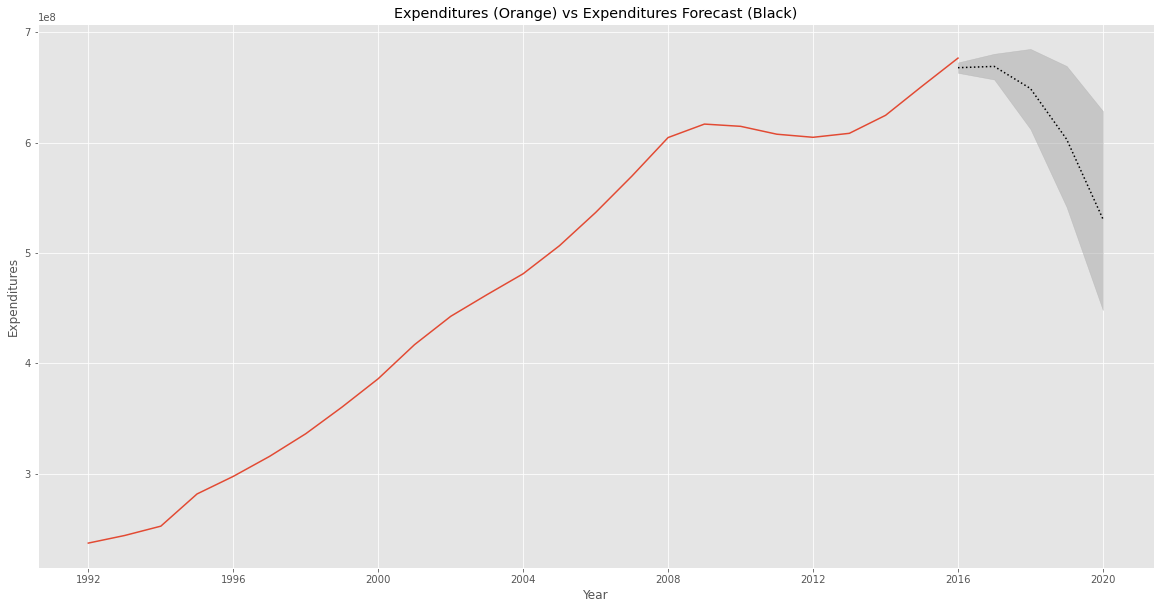

In [34]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.y)
ax1.plot(viz_df.yhat_scaled, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Expenditures (Orange) vs Expenditures Forecast (Black)')
ax1.set_ylabel('Expenditures')
ax1.set_xlabel('Year')
ax1.get_yaxis().get_major_formatter().set_useOffset(False)

The orange line is actual expenditure data and the black dotted line is the forecast. The gray shaded area is the uncertaintity estimation of the forecast.